In [1]:
import re
import os
import numpy as np
import pylab as plt
import random

In [2]:
def extract_snr(filename):
    match = re.search(r"SNR=(\d+\.\d{1,3})", filename)
    if match:
        return float(match.group(1))
    else:
        return 0


# Function to load labels from filenames
def load_labels_from_directory(directory):
    labels = []
    filenames = []
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".png"):
                try:
                    snr = extract_snr(filename)
                except ValueError:
                    snr = 0  # Label for noise
                labels.append(snr)
                filenames.append(os.path.join(root, filename))
    return np.array(labels), filenames


labels_data, filenames_data = load_labels_from_directory(
    "/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data"
)

labels_noise, filenames_noise = load_labels_from_directory(
    "/home/arush/GW_Project_1/Data_Generation/Continous_Check/noise"
)


labels = np.concatenate((labels_data, labels_noise))
filenames = np.concatenate((filenames_data, filenames_noise))

combined = list(zip(labels, filenames))

random.seed(42)
random.shuffle(combined)

labels, filenames = zip(*combined)

labels = np.array(labels)
filenames = np.array(filenames)

In [3]:
print(len(labels))

39100


In [4]:
array = []
for i in range(len(labels)):
    array.append(int(labels[i]))

In [5]:
snr_count = []
for i in range(len(array)):
    snr_count.append(0)

In [6]:
for j in range(len(labels)):
    snr_count[int(labels[j])] += 1

In [7]:
array_zreoure = []
for k in range(21):
    array_zreoure.append(snr_count[k])

In [8]:
print(array_zreoure)

[3100, 0, 0, 0, 0, 387, 1052, 1917, 2481, 2564, 2714, 2821, 2769, 2631, 2569, 2595, 2590, 2964, 2936, 3010, 0]


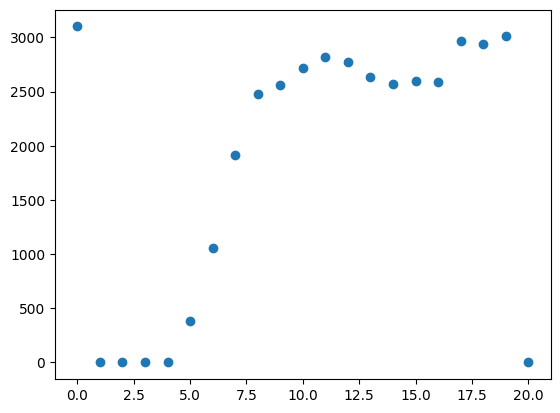

In [9]:
plt.plot(array_zreoure, "o")